# Да ли је музика младости ваших родитеља другачија од музике ваше младости?

Сигурно сте од својих родитеља (и од њихових родитеља) пуно пута чули да ово што ви данас слушате не може ни да се пореди са Музиком Њихове Младости. Овакве „осуде“ музичког укуса данашњих генерација могу подстаћи више истраживачких питања, нпр. да ли су неки жанрови које су наши родитељи више ценили сада мање заступљени, или су се и сами жанрови променили (чули сте сигурно и нешто попут „То што ти слушаш није рок, зна се шта је рок и то више не постоји“ и варијација на ту тему). Циљ истраживања у наставку је да пробамо да видимо да ли подаци поткрепљују овакве тврдње.


Немамо на располагању омиљене или најпопуларније песме које одговарају баш вашим ближњима којима се ваша музика не допада, али имамо велики број песама издатих у различитим годинама, па можемо истражити да ли су се неке од карактеристика жанрова мењале, да ли је заступљеност различитих жанрова иста кроз време и слично. Да бисмо генерализовали закључке, неопходно је да **узорак**, односно скуп песама чије карактеристике имамо на располагању буде **репрезентативан**, односно насумично изабран. О овоме се посебно води рачуна када се, на пример, спроводе истраживања у којима учествују испитаници и на основу чијих одговора ми желимо да донесемо закључак о понашању целе популације (видите нпр. групу лекција о *Јавном здрављу*). Међутим, када су у питању подаци који су сакупљени за неку другу намену (нпр. у овом случају песме су прво прикупљене и анализиране за потребе платформе *Spotify*, а затим је њихов подскуп прикупљен за истраживачке сврхе), репрезентативност често неће бити гарантована. Шта мислите зашто је то тако? Један одговор крије се у томе да нису све песме систематично дигитализоване и постале доступне на *Spotify* платформи – сигурно има неких старих или локалних песама за које није било превеликог интересовања глобалних корисника ове платформе, па се на њој нису нашле. 
То што имамо разлога да сумњамо у репрезентативност ових песама (у односу на неки најшири скуп **свих песама** на свету) не значи да наша анализа нема смисла, само је потребно да будемо опрезнији у закључивању. Не би требало да тврдимо да је хип хоп *увек* онакав каквим се чини у нашој анализи, већ да тврдимо да је хип хоп *који се слуша на Spotify платформи* такав.

In [1]:
# učitavanje neophodnih biblioteka:
import pandas as pd # manipulacija tabelarnim podacima
import matplotlib.pyplot as plt # vizualizacija podataka
import numpy as np # manipulacjia nizovima
import seaborn as sns # vizualizacija podataka

In [2]:
podaci = pd.read_csv('muzika podaci/music_data.csv') # učitavanje prethodno pripremljenog skupa podataka i čuvanje u promenljivoj podaci
podaci.tail(2) # podsetnik sta je u podacima koje obrađujemo, ovaj put kroz prikaz poslednja dva reda da se upoznamo i sa ovom alternativom funkciji head

,Godina,Izvođač,Naziv_pesme,Žanr,Akustičnost,Plesozovnost,Instrumentalnost,Glasnoća,Valentnost,Energičnost,Muzička_dekada
28370,2019,will smith,switch,hip hop,0.007027,0.883028,0.000503,0.786888,0.508450,0.885882,2010s
28371,2019,jeezy,r.i.p.,hip hop,0.015862,0.828875,0.000000,0.674794,0.475474,0.492477,2010s


За почетак, проверимо који временски период нам је на располагању, тј. колико далеко у прошлост можемо истраживати карактеристике музичких нумера. Погледајмо прву и последњу годину за које имамо расположиве податке користећи колону `Godina` и функције `min` и `max`:

In [3]:
min(podaci['Godina']),max(podaci['Godina'])

(1950, 2019)

Видимо да у оквиру скупа података постоје песме од 1950. па до 2019. године, чиме имамо на располагању седам деценија да истражимо евентуалне промене. Међутим, сада смо само видели прву и последљу годину у одговарајућој колони – не знамо да ли за сваку годину имамо довољно података да бисмо изводили адекватне закључке. Да бисмо то проверили, можемо као у претходном одељку избројати колико се пута свака од година појављује у одговарајућој колони. Овај пут резултате функције `value_counts` нећемо приказати као табелу, већ ћемо их нацртати.

Један природан избор визуализације података овог типа је стубичасти дијаграм. Позиције стубића одговарају годинама у хронолошком редоследу, а висина стубића одговара броју песама у датој години:

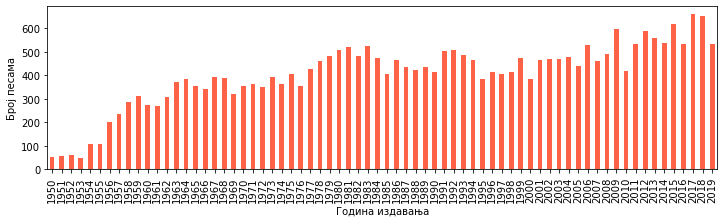

In [4]:
# za sada ne obraćajte paznju na ovaj kod, samo na grafik, a na kraju sveske se ponovo vratite i na ovaj kod

broj_pesama_po_godinama = podaci['Godina'].value_counts() # broj pesama po godinama, rezultat je sačuvan kao pandas series objekat
broj_pesama_po_godinama = broj_pesama_po_godinama.sort_index() # sortiramo rezultate po godinama od najmanje do najveće
broj_pesama_po_godinama.plot(kind='bar',figsize=(12,3),color='tomato') # koristimo funkciju plot u okviru pandas biblioteke kojoj dodatnim argumentima definišemo specifičnosti, npr. kind definiše tip grafika, ovde stubičasti 
plt.xlabel('Година издавања') #dodajemo ime x osi
plt.ylabel('Број песама') #dodajemo ime y osi
plt.show() #prikaz grafika

Алтернативно исте податке можемо приказати и тачкицама (лево), тако да х координата тачке одговара години издавања песме, док у координата, тј. висина тачке на дијаграму одговара броју песама. Са десне стране приказани су исти подаци, али тако што су избројане песме издате у периодима од по десет година (од 1950. до 1959, од 1960. до 1969, итд):

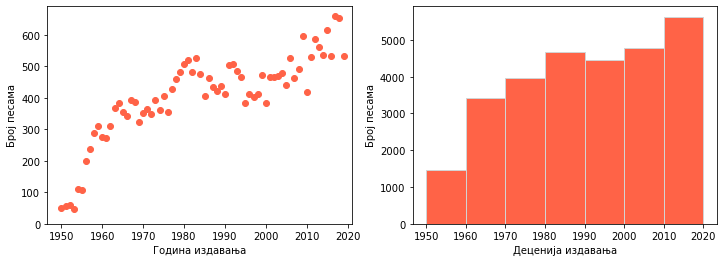

In [5]:
# za sada ne obraćajte paznju na ovaj kod, samo na grafik, a na kraju sveske se ponovo vratite i na ovaj kod

plt.figure(figsize=(12,4)) # veličina prostora za crtanje, pošto crtamo dva grafika prostor je širi a sa manjom visinom

plt.subplot(1,2,1)
podaci['Godina'].value_counts().plot(ls='',marker='o',color='tomato') #brojimo pojavljivanje svake od razlicitih godina u okviru kolone a zatim crtamo
plt.ylim(bottom=0) # obezbedjujemo da y osa pocinje od 0 (negativan broj pesama u godini nema smisla)
plt.xlim(right=2021) # obezbedjujemo da x osa sadrzi i trenutnu godinu 
plt.xlabel('Година издавања') #dodajemo ime x osi
plt.ylabel('Број песама') #dodajemo ime y osi

plt.subplot(1,2,2)
plt.hist(podaci['Godina'],bins = [*range(1950,2030,10)],color='tomato',edgecolor='lightgrey') #funkcija hist za nas broji godine u svakom od intervala, zadatim argumentom bins, i rezultat prikazuje visinom stubića na dijagramu
plt.xlabel('Деценија издавања') #dodajemo ime x osi
plt.ylabel('Број песама') #dodajemo ime y osi

plt.show()

<div class="alert alert-block alert-info"><img src="muzika slike/zad.png" align="left" width ="70"/>Десни график можете добити на исти начин као и први, ако примените функцију бројања на неку другу колону - можете да покушате да промените кôд и дођете до тог резултата. Не брините ако вам је претходни кôд прекомпликован, у наставку ћемо мало по мало изградити разумевање и научити како да га репродукујемо, након чега се можете вратити овом задатку.</div> 

In [6]:
# #rešenje
# broj_pesama_po_decenijama = podaci['Muzička_dekada'].value_counts() # broj pesama po godinama, rezultat je sačuvan kao pandas series objekat
# broj_pesama_po_decenijama = broj_pesama_po_decenijama.sort_index() # sortiramo rezultate po godinama od najmanje do najveće
# broj_pesama_po_decenijama.plot(kind='bar',color='tomato') # koristimo funkciju plot u okviru pandas biblioteke kojoj dodatnim argumentima definišemo specifičnosti, npr. kind definiše tip grafika, ovde stubičasti 
# plt.xlabel('Деценија издавања') #dodajemo ime h osi
# plt.ylabel('Број песама')#dodajemo ime u osi
# plt.show() #prikaz grafika

Претходна три графика на различите начине приказују информацију о броју песама које су издате у одређеној години (или декади). Видимо да у скупу података најмање имамо песама из педесетих година прошлог века, док је највише песама из претходне деценије. Осим педесетих из којих имамо значајно мање песама, све остале декаде су слично заступљене, иако је било година и са више и мање песама (што можемо видети на првом стубичастом дијаграму).

Пораст броја песама са временом је донекле и очекиван и у складу са доступношћу технологије. Међутим, треба имати на уму да график који смо добили не говори о укупном броју песама које постоје из сваке године, већ само о броју тих песама у нашем скупу података. Иако имамо разлога да верујемо да је скуп података насумичан подскуп свих песама доступних на *Spotify* платформи, треба увек бити опрезан око тумачења резултата насталих на узорку.

Предност стубичастих дијаграма је што се једноставно могу упоредити њихове висине и са већом лакоћом се може утврдити у којој години (деценији) има више песама. Међутим, када број стубића постане превелики (као у случају првог графика у ком има 70 стубића) ова предност престаје, тј. са великом лакоћом можемо упоредити оближње стубиће, али није једнако лако оценити да ли је више песама из 1973. или 1996. Тачкасти дијаграми нам не помажу пуно код претходно поменутог проблема – одабир две тачке и тачно очитавање њихових х и у координата није увек најједноставније, али су ови графици изузетно згодни када покушавамо да уочимо да ли постоји тренд међу подацима. У овом случају на тачкастом дијаграму лакше видимо да постоји тренд раста песама кроз време у посматраном периоду од 70 година. Мањи број стубића, као на хистограму десно, помаже да лако уочимо тренд али и да са лакоћом упоредимо заступљеност различитих деценија у подацима. Са друге стране, изгубили смо на детаљности приказа података.

При избору графика увек је кључно да размислите о поруци коју хоћете да пошаљете. Изнад смо показали да ће једна од ове три визуализације бити боља од других, али не увек, већ зависно од тога да ли је циљ да приказати постојање временског тренда, јасније очитавање броја песама за сваку годину или за сваку деценију.

**Да научимо како цртати овакве графике:** истражимо, на пример, да ли је и број песама одређеног жанра променљив током времена, као што видимо да је укупан број издатих песама. Погледајмо то прво за поп музику. За почетак ћемо у нову променљиву сачувати копију табеле која садржи песме поп жанра и проверити број редова у тој табели:

In [7]:
popmuzika = podaci[podaci.Žanr=='pop'].copy() # selektujemo samo podatke za pesme pop žanra
len(popmuzika) # provera koliko imamo pop pesama u skupu

7042

Видимо да је готово четвртина песама поп жанра. За број песама по годинама, на колону `Godina` ове нове табеле применићемо функцију [value_counts](value_counts) и резултате сместити у нову променљиву.

In [8]:
pop_tokom_vremena = popmuzika['Godina'].value_counts() # brojimo pesme pop žanra po godinama
type(pop_tokom_vremena)

pandas.core.series.Series

Резултат бројања појављивања различитих година, сачуван је као серија, што је практично колона података у оквиру pandas библиотеке – више можете погледати у документацији [овде](https://pandas.pydata.org/docs/reference/api/pandas.Series.html). Погледајмо прве редове – типична функција `head()` може се применити и на серију:

In [9]:
pop_tokom_vremena.head()

2015    158
1968    142
2013    137
1982    133
1991    132
Name: Godina, dtype: int64

Садржај ове серије су бројеви песама у свакој години, тако да су дате године искоришћене као индексна колона. Често ћемо желети да користимо и године као *обичну* колону којом можемо манипулисати, али у овом случају најједноставније графике попут горе нацртаних можемо направити баш чувајући овај формат података. Најпре још да сортирамо ове податке по години користећи `sort_index()`:

In [10]:
pop_tokom_vremena = pop_tokom_vremena.sort_index()
pop_tokom_vremena.head()

1950    10
1951     8
1952    11
1953    11
1954    14
Name: Godina, dtype: int64

Најједноставнији график можемо добити само коришћењем [plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) функције у оквиру `pandas` библиотеке. Подразумевани облик овог графика је линијски график у коме су све вредности (броја песама сваке године) повезане пуном линијом плаве боје:

<AxesSubplot:>

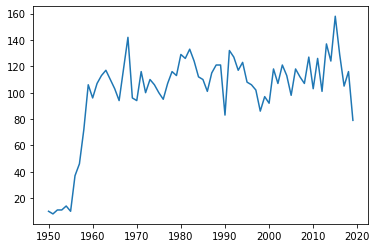

In [11]:
pop_tokom_vremena.plot()

Већ на овом графику можемо одмах видети да укупан број поп песама на платформи *Spotify* прати сличан тренд током година као и укупан број свих песама – најмање песама има у педесетим годинама, а затим број песама брзо порасте и благо варира из године у годину.

Функција `plot` настала је адаптацијом сродних функција из [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) библиотеке, тако да можемо користити функције из ове веће библиотеке за цртање да поправимо овај график и допишемо имена оса, променимо боје и слично:

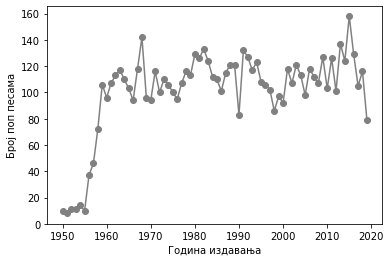

In [12]:
pop_tokom_vremena.plot(marker='o',color='grey') #tačkastim dijagramom prikazujemo dobijene rezultate
plt.ylim(bottom=0) # obezbeđujemo da u osa počinje od 0 (negativan broj pesama u godini nema smisla)
plt.xlabel('Година издавања') #ime х ose
plt.ylabel('Број поп песама') #ime у ose
plt.show()

Сада смо у оквиру функције `plot` искористили пар додатних аргумената: `marker` да додатно истакнемо податке које цртамо и разликујемо њихове позиције од линија које их повезују и `color` којим смо дефинисали боју података. Додатно, аргументом `ls` стилом линије, од енгл. *line style*, можете променити линију која повезује тачке (нпр. `ls=''` ће уклонити линију и тако ћете добити график који личи на тачкасти график са почетка лекције, док ће `ls='--'` нацртати испрекидану линију између тачака). Функција `plot` има још један врло згодан аргумент којим можете мењати тип графика, `kind`, којим можете изабрати и стубичасти дијаграм (пробајте `kind='bar'` и добићете нешто што више личи на први график у овој свесци).

In [13]:
# #rešenje

# plt.figure(figsize=(12,3)) # promenili smo dimenzije slike da bi se sve godine lepo videle
# pop_tokom_vremena.plot(kind='bar',color='grey') #tačkastim dijagramom prikazujemo dobijene rezultate
# plt.ylim(bottom=0) # obezbeđujemo da u osa počinje od 0 (negativan broj pesama u godini nema smisla)
# plt.xlabel('Година издавања') #ime x ose
# plt.ylabel('Број поп песама') #ime y ose
# plt.show()

Додатно смо функцијама библиотеке `matplotlib.pyplot` (чије смо име при учитавању скратили у `plt`) поред података, обезбедили да график има и информације шта је на осама тако што смо исписали имена х и у осе (функције [xlabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) и [ylabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html)). Обезбедили смо и да *у*-оса почиње од 0 (функција [ylim](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html)) и приказали график. Приказивање графика се дешава и без функције [show](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html) – обратите пажњу на прву верзију графика плаве боје, и тамо је график исцртан, али је постојао додатни испис, када искористимо функцију `show` доијамо само графичке елементе без пропратних исписа.

<div class="alert alert-block alert-info"><img src="muzika slike/zad.png" align="left" width ="70"/>Пробајте да припремите сличан график за друге жанрове и користећи друге вредности аргумената функција (нпр. друге боје, другог типа линије која спаја податке, или користећи стубичасти дијаграм).</div> 

In [14]:
# # rešenje

# izabrana_muzika = podaci[podaci.Žanr=='rock'].copy() # selektujemo samo podatke za pesme žanra po izboru, ovde rok
# izabrana_muz_tokom_vremena = izabrana_muzika['Godina'].value_counts() # brojimo pesme odabranog žanra po godinama
# izabrana_muz_tokom_vremena = izabrana_muz_tokom_vremena.sort_index() # sortiramo vrednosti po godinama
# izabrana_muz_tokom_vremena.plot(ls='--',marker='*',color='olive') #tačkastim dijagramom prikazujemo dobijene rezultate
# plt.ylim(bottom=0) # obezbeđujemo da u osa počinje od 0 (negativan broj pesama u godini nema smisla)
# plt.xlabel('Година издавања') #ime x ose
# plt.ylabel('Број песама') #ime y ose
# plt.show()

Ако сте покушали да урадите претходни задатак, прошли сте кроз различите ћелије кôда изнад и спојили пар редова у један низ у коме сте само мењали име жанра у првом селектовању података из табеле. Када бисмо сада хтели да нацртамо један график за сваки од жанрова, скупило би се бар петнаестак линија кôда који се махом понавља – осим издвајања подтабеле за жанр, све остале команде би биле исте. Ово је онда прави повод да се уведе функција. Да не бисмо изнова и изнова писали кôд са само једном изменом, спаковаћемо претходне линије кôда у једну **[функцију](https://petlja.org/biblioteka/r/lekcije/TxtProgInPythonSrLat/02_console-02_console_15_defining_functions)** и затим њеним позивањем цртати графике за различите жанрове:

In [15]:
def broj_pesama_zanra(odabrani_zanr):
    """
    Za *odabrani_zanr* koji je tipa string, tj. ta promenljiva sadrži ime muzickog žanra, 
    ova funkcija izdvaja podatke samo tog žanra i broji pesme datog žanra u svakoj godini. 
    U prethodnom primeru *odabrani_zanr* je bio pop, a sada pišemo funkciju koja će raditi 
    za bilo koji od mogućih žanrova.
    
    Rezultat ove funkcije je tačkasti grafik izdvojenih podataka na osnovu odabranog_zanra.
    """
    # definišemo rečnik u kome su engleski nazivi svih žanrova ključevi, a ćirilični, srpski prevodi vrednosti
    # ovaj recnik će nam koristiti za legendu
    zanr_cirilicom = {'pop':'поп','country':'кантри','blues':'блуз','jazz':'џез','reggae':'реге','rock':'рок','hip hop':'хип хоп'}

    muzika = podaci[podaci.Žanr==odabrani_zanr] # selektujemo samo podatke za pesme odabranog žanra
    zanr_u_vremenu = muzika['Godina'].value_counts() # brojimo pesme odabranog žanra po godinama
    zanr_u_vremen = zanr_u_vremenu.sort_index() # sortiramo vrednosti po godinama 
    zanr_u_vremenu.plot(ls='',marker='o',color='grey') # tačkastim dijagramom prikazujemo dobijene rezultate
        
    plt.ylim(bottom=0) # obezbeđujemo da u osa počinje od 0 (negativan broj pesama u godini nema smisla)
    plt.xlabel('Година издавања') #ime x ose
    plt.ylabel('Број песама') #ime y ose
    plt.legend(['Музички жанр је ' + zanr_cirilicom[odabrani_zanr]]) # u legendu unosimo ime žanra
    plt.xlim([1950,2021]) # za svaki žanr, nezavisno da li ima pesme iz celog opsega posmatranih godina fiksiramo istu h osu za lakše poređenje

Сада можете и претходни задатак решити у једном реду користећи написану функцију, на пример, ако сте посматрали број рок песама на следећи начин: `broj_pesama_zanra('rock')`. 
Смањење броја потребних линија кôда уз помоћ функције, поједностављује нам и цртање више жанрова на једној слици. На пример, функцијом [`subplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) и нашом функцијом можемо уз само пар линија кôда на једној слици приказати 2 жанра. Функција `subplot` позива се увек са 3 аргумента: први је број редова, други је број колона, док је трећи број редни број графика који цртате. У нашем случају, ако желимо да нацртамо 2 графика један изнад другог, радићемо  то тако што користимо `plt.subplot(2,1,1)` за горњи график и `plt.subplot(2,1,2)` за доњи, овако:

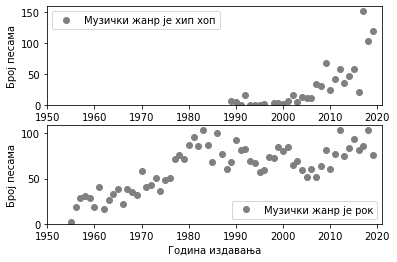

In [16]:
plt.subplot(2,1,1) # fokusiramo se na crtanje gornjeg od 2 grafikona
broj_pesama_zanra('hip hop') # pozivamo napisanu funkciju za žanr hip hop
plt.subplot(2,1,2) # crtamo donji od 2 grafikona
broj_pesama_zanra('rock') # pozivamo funkciju za žanr rok

Видимо да број различитих песама по годинама није исти за различите жанрове. Док се број песама поп жанра не мења драстично од 1960-их до данас, број рок и хип хоп песама је мало променљивији на посматраном периоду. Специфично, најстарија хип хоп песма у скупу је из 1980-их (што отприлике одговара и периоду када овај жанр постаје популаран), од када углавном расте. Са друге стране, највећи број песама рок жанра у доступним подацима издат је током раних 1980-их и током 2010-их година. *Истражите ове графике и за преостале жанрове!*

In [17]:
# na primer:
# broj_pesama_zanra('jazz')

Али нас заправо више занима да ли су се карактеристике музике мењале кроз време – сетите се, ми желимо да истражимо да ли је наша данашња музика другачија од музике наших родитеља. Наравно, ако ви слушате првенствено хип хоп, ви већ донекле имате свој одговор – овај правац је био тек у својом почецима током младости ваших родитеља, а није ни постојао током времена њихових родитеља. Међутим, поред броја песама, ми желимо да видимо како су се карактеристике песама и жанрова мењале током претходних деценија.

<details>    
<summary>    
    <img src="muzika slike/click.png" align="left" width="50"/>
    <font color="darkgreen"><b>Да ли се сећате карактеристика песама које имамо на располагању? Да ли имате претпоставку која од музичких карактеристика се највише мењала кроз време?</b></font>
</summary>
Од карактеристика које анализирамо (акустичност, инструменталност, гласноћа, плесозовност, валентност, енергичност), неке делују као да се вероватно неће пуно мењати кроз време – нпр. очекивали бисмо да се песме за плес појављују једнако често и данас и пре пар десетина година (анегдотски, чини се као да је лето време када се објављују нови хитови за играње), али је можда свеприсутност технологије оставила јак печат и у музици, па се можда акустичност променила. Како ћемо то проверити? 

Можемо проверити жељену карактеристику за коју претпостављамо да се мењала (или, напротив, неку за коју претпостављамо да се није мењала) у оквиру целог скупа података, а и по жанровима. Сетимо се, акустичност је број између 0 и 1 који говори о томе да ли у песми доминирају акустични инструменти (вредности ближе 1), или електрични (вредности ближе 0). Да проверимо да ли се акустичност музике свеукупно мењала током посматраног периода (иако очекујемо да су неки жанрови више акустични од других), зато што претпостављамо да је уплив технологије у све сфере нашег живота, па тако и у музику, довољно јак да приметимо промене.

Ово можемо урадити тако што у оквиру скупа података групишемо све податке који имају исту годину издавања (`Godina`) и у оквиру сваке групе израчунамо просечну вредност акустичности (`Akustičnost`). То радимо користећи функције [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) и [`mean`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html):

In [18]:
akusticnost_prosek = podaci.groupby('Godina').Akustičnost.mean()
akusticnost_prosek.head()

Godina
1950    0.861477
1951    0.833731
1952    0.854317
1953    0.858078
1954    0.851431
Name: Akustičnost, dtype: float64

Променљива `akusticnost_prosek` сада садржи просечну вредност акустичности за сваку годину, што можете проверити лоцирањем вредности акустичности за годину по избору, користећи [`loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html):

In [19]:
akusticnost_prosek.loc[1998]

0.23608650503883497

Као што смо претходно увежбали, ове податке можемо згодно и брзо нацртати користећи функцију `plot` библиотеке `pandas`:

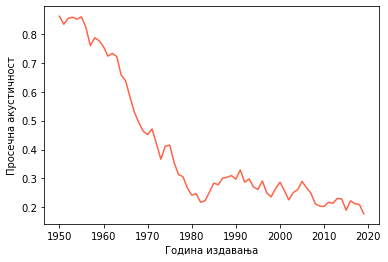

In [20]:
akusticnost_prosek.plot(color='tomato') # crtamo podatke linijskim dijagramom kome smo samo odabrali boju
plt.xlabel('Година издавања') # dodajemo naziv x ose
plt.ylabel('Просечна акустичност') # dodajemo naziv y ose
plt.show() # prikazujemo grafik

Видимо да је просечна акустичност била највиша током педесетих година. Након тога, видимо да је просечна вредност акустичности у песмама свих жанрова опадала до осамдесетих година, након чега постоји мали раст, али генерално од тада па до данас, просечна акустичност је ниска. Ово наравно не значи да данас не постоји акустична музика, чак не значи ни да су све песме на *Spotify* платформи електричне, већ да је у просеку песама акустичност ниска, али могу постојати и песме са већом и мањом акустичношћу од просека – тиме ћемо се више бавити у наредним радним свескама.

Уместо да истражујемо само акустичност, можемо издвојити просечне вредности за све музичке атрибуте. Урадићемо то за неке жанрове, тако што ћемо опет издвајати податке за одређени жанр, а затим их груписати по годинама и израчунати просечне вредности по свим расположивим музичким атрибутима:

In [21]:
# u jednu listu skupili smo sve nazive kolona, muzičkih atributa, da bismo lakše za sve njih izračunali prosečnu vrednost
muzicki_atributi = ['Akustičnost', 'Plesozovnost', 'Instrumentalnost', 'Glasnoća','Valentnost', 'Energičnost'] 

In [22]:
pop_muzika = podaci[podaci.Žanr=='pop']  # izdvajamo pop muziku i čuvamo je u novoj promenljivoj
pop_prosek = pop_muzika.groupby('Godina')[muzicki_atributi].mean() # grupišemo pop muziku po godinama i za svaki od muzičkih atributa računamo prosek
jazz_prosek = podaci[podaci.Žanr=='jazz'].groupby('Godina')[muzicki_atributi].mean() # isto, samo za džez muziku
pop_prosek.head(2) # prikaz prva 2 reda prosečnih vrednosti muzičkih atributa za pop muziku

,Akustičnost,Plesozovnost,Instrumentalnost,Glasnoća,Valentnost,Energičnost
Godina,,,,,,
1950,0.807189,0.472003,0.110172,0.623585,0.517931,0.371952
1951,0.837600,0.538341,0.452024,0.616828,0.554642,0.368349


Сада лако можемо поредити ова два жанра по одабраним параметрима. Ево на пример промена у акустичности и разиграности у џез и поп музици:

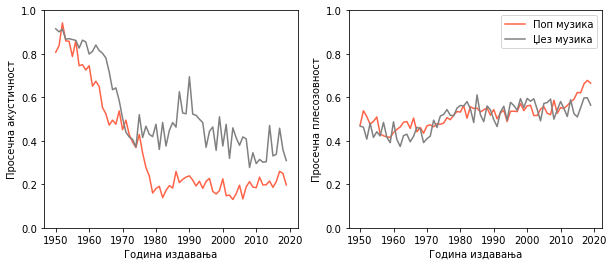

In [23]:
plt.figure(figsize=(10,4)) # definišemo veličinu prostora na kome ćemo crtati - 10 je širina, 4 je visina mereno u inčima

plt.subplot(1,2,1) # sada crtamo slike u redu, zato 1,2 dok je poslednji broj tu da označi da prvo crtamo na levom prostoru
pop_prosek.Akustičnost.plot(label = 'Поп музика',color='tomato') # crtamo prosečnu akustičnost pop muzike
jazz_prosek.Akustičnost.plot(label = 'Џез музика',color='grey') # crtamo prosečnu akustičnost džez muzike
plt.xlabel('Година издавања') # dodajemo naziv x ose
plt.ylabel('Просечна акустичност') # dodajemo naziv y ose
plt.ylim([0,1]) # definišemo raspon y ose od 0 do 1

plt.subplot(1,2,2) # sada crtamo na desnom od dva grafika u jednom redu
pop_prosek.Plesozovnost.plot(label = 'Поп музика',color='tomato') # plesozovnost pop muzike
jazz_prosek.Plesozovnost.plot(label = 'Џез музика',color='grey') # plesozovnost džez muzike
plt.xlabel('Година издавања') # dodajemo naziv x ose
plt.ylabel('Просечна плесозовност') # dodajemo naziv y ose
plt.ylim([0,1]) # raspon y ose
plt.legend() # crtamo legendu samo na desnom grafiku, pošto koristimo iste boje na oba, pa nema potrebe da se ponavljamo

plt.savefig('muzika slike/Dzez_Pop_akusticnost_razigranost.png',dpi=300) # čuvamo sliku
plt.show() # prikazujemo grafik

Овакви упоредни графици нам олакшавају поређење и истовремено закључивање о више варијабли (овде акустичност и разиграност) и више различитих категорија података (овде музичких жанрова поп и џез). На левом графику видимо да акустичност и појединачних музичких жанрова опада током времена на сличан начин као и када смо анализирали све музичке нумере заједно – акустичност је била највиша током педесетих, од када опада до осамдесетих и од тада до данас има мање или веће варијације око неке стабилне вредности. Интересантно код овог графика за два жанра је што можемо видети да је просечна вредност акустичности џез музике већа од акустичности поп музике, као и да су варијације од године до године веће у џез музици. Десни график са друге стране говори нам да се просечна вредност плесозовности много мање мењала током посматраног периода (за то је посебно важно што смо оба распона у осе подесили на исте вредности и стога лакше закључујемо који параметар се више мењао). Видимо да постоји благи тренд раста просечне плесозовности, али не постоје уочљиве разлике између жанрова – некад је вредност већа код џеза, а некад код попа.

На овим графицима смо додатно обезбедили да у оба случаја распон бројева на у оси одговара свим могућим вредностима (овде од 0 до 1). Без ових додатних команти, за график се увек распон одреди аутоматски тако да сви подаци буду на графику. У овом случају, сви подаци са десног графика могу стати у распон од око 0.3 до око 0.7 (погледајте како изгледа график ако линију `plt.ylim([0,1])` ставите под коментар). Такви прикази нам згодно представљају да ли постоје промене, али ако желимо да оценимо колике су те промене у односу на могуће или у односу на промене неког другог параметра (као овде), згодно је обезбедити да су распони на оба графика исти.

<div class="alert alert-block alert-info"><img src="muzika slike/zad.png" align="left" width ="70"/>Испробајте неку другу комбинацију музичких жанрова и музичких атрибута и представите резултате истим упоредним линијским графиком који је искоришћен изнад. На пример, можете проверити да ли је и гласноћа нешто што се мењало, опет као последица технологије.</div> 

In [24]:
# #rešenje

# rok_prosek = podaci[podaci.Žanr=='rock'].groupby('Godina')[muzicki_atributi].mean() # grupišemo pop muziku po godinama i za svaki od muzičkih atributa računamo prosek
# rege_prosek = podaci[podaci.Žanr=='reggae'].groupby('Godina')[muzicki_atributi].mean() # isto, samo za rege muziku

# plt.figure(figsize=(10,4)) # definišemo veličinu prostora na kome čemo crtati 10 je širina, 4 je visina mereno u inčima

# plt.subplot(1,2,1) # sada crtamo slike u redu, zato 1,2 dok je poslednji broj tu da oznaci da prvo crtamo na levom prostoru
# rok_prosek.Glasnoća.plot(label = 'Рок музика',color='tomato') # crtamo prosečnu akusticnost pop muzike
# rege_prosek.Glasnoća.plot(label = 'Реге музика',color='grey') # crtamo prosečnu akusticnost rege muzike
# plt.xlabel('Година издавања') # dodajemo naziv x ose
# plt.ylabel('Просечна гласност') # dodajemo naziv y ose
# plt.ylim([0,1]) # definišemo raspon y ose od 0 do 1

# plt.subplot(1,2,2) # sada crtamo na desnom od dva grafika u jednom redu
# rok_prosek.Valentnost.plot(label = 'Рок музика',color='tomato') # plesozovnost pop muzike
# rege_prosek.Valentnost.plot(label = 'Реге музика',color='grey') # plesozovnost rege muzike
# plt.xlabel('Година издавања') # dodajemo naziv x ose
# plt.ylabel('Просечна позитивост') # dodajemo naziv y ose
# plt.ylim([0,1]) # raspon y ose
# plt.legend() # crtamo legendu samo na desnom grafiku pošto koristimo iste boje na oba pa nema potrebe da se ponavljamo

# plt.show() # prikazujemo grafik

Коначно, показаћемо да припрема података коју смо претходно правили – груписање и рачунање просечне вредности по годинама – може да се уради још једноставније у оквиру функције која ће на крају аутоматски нацртати и резултате. У питању су библиотека функција [seaborn](https://seaborn.pydata.org/) (коју скраћено називамо `sns`) и функција [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html). Када наиђе на више података са истом х координатом (у нашем случају годином издавања) за које има различите вредности у координате (у нашем случају изабрана музичка карактеристика), ова функција за у координату црта просечну вредност и без наше претходне припреме – видите на пример овде:

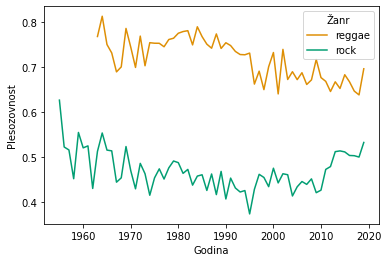

In [25]:
rock_reggae = podaci[(podaci.Žanr=='reggae')|(podaci.Žanr=='rock')] # izdvajamo samo dva muzička žanra zarad lakšeg prikaza na grafiku
sns.lineplot(data = rock_reggae, # izbor podataka koje crtamo
             x = 'Godina',y='Plesozovnost', # izbor kolona koje se nalaze na x i y osi
             hue='Žanr', # biramo da linije budu obojene po žanrovima
             palette=sns.color_palette("colorblind")[1:3], # definišemo boje, u ovom slučaju 2. i 3. boju iz palete prikazane u nastavku
             ci=None) # ovim parametrom definišemo da se na grafiku pojave samo izračunate prosečne vrednosti; više o tome u nastavku
plt.show()

У односу на претходно нацртане графике, овај пут нисмо морали да дефинишемо име х и у осе, као ни легенду – то је све преузето на основу имена колона (за колоне о години и плесозовности) и података у њима (за колону жанр). То нас не спречава да претходно коришћене команде (`plt.xlabel`, `plt.ylabel` и сличне) додамо и тако обезбедимо да добијени график има ћириличне исписе (побајте да измените кôд). 

Уместо бирања боја по имену или хекс-кôду као на другим местима, у последњој функцији смо искористили постојећу палету боја у оквиру `seaborn` библиотеке. Специјално, ово је палета боја у којој је вођено рачуна да и особе које имају потешкоћа са разликовањем боја могу уочити разлике међу њима – видите све боје ове палете овде:

In [26]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

У овом другом приступу цртању одабрали смо да упоредимо реге и рок песме и њихове просечне вредности плесозовности. Видимо да су реге песме током целог посматраног периода оцењене као више плесозовне од рок песама. Ваша индивидуална оцена ових жанрова и њихове плесозовности се може разликовати од ове, али је интересантно да је на великом броју песама и током великог броја година просечна вредност плесозовности  реге песама увек виша од просечне вредности плесозовности  рок песама. Пре него што придамо овом сазнању додатну важност, у наредним свескама ћемо истражити колико је заправо просек репрезентативан. Проверићемо да ли су песме неког жанра углавном у близини просечне по овом или другим критеријумима, да ли има пуно песама које одступају и да ли можемо разликовати и ауторе, а не само жанрове по овим музичким карактеристикама.